In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import streamlit as st
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset
dataset = pd.read_csv("Ecommerce_Customers.csv")

In [3]:
dataset.head(5)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
dataset.shape

(500, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
dataset.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
dataset.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
dataset.drop_duplicates()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


<Figure size 1000x500 with 0 Axes>

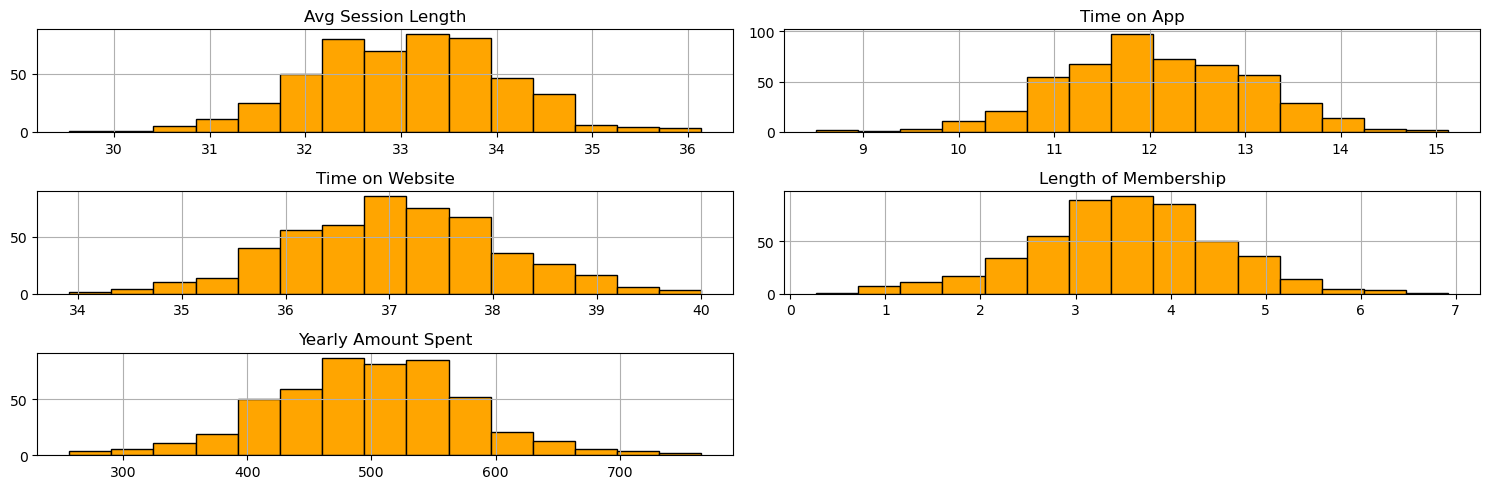

In [9]:
# Distribution of numerical features
plt.figure(figsize=(10, 5))
dataset.hist(bins=15, figsize=(15, 5), color='orange',edgecolor = "black")
plt.tight_layout()
plt.show()

C:\Users\Akky\AppData\Local\Temp\ipykernel_30248\2193098357.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='Reds', linewidths=0.5)


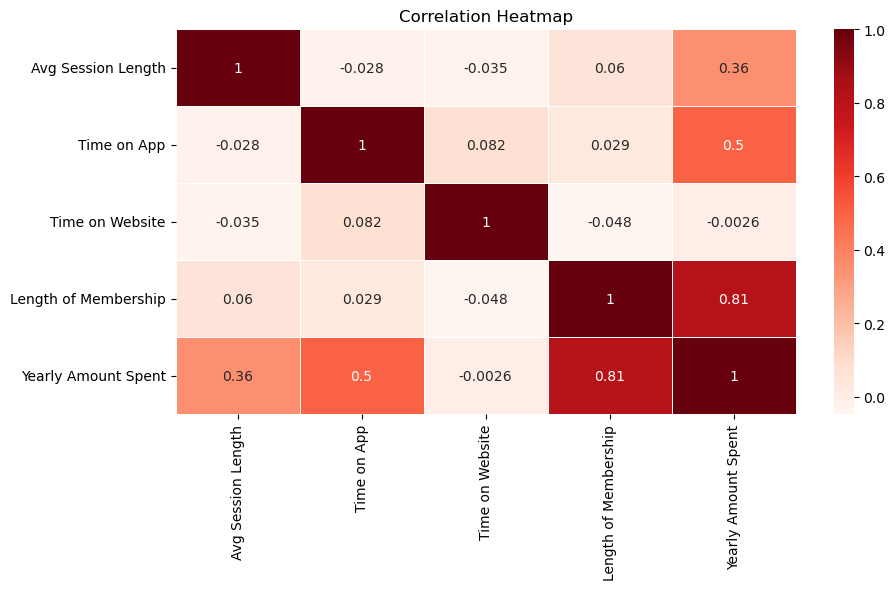

In [10]:

# Correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dataset.corr(), annot=True, cmap='Reds', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

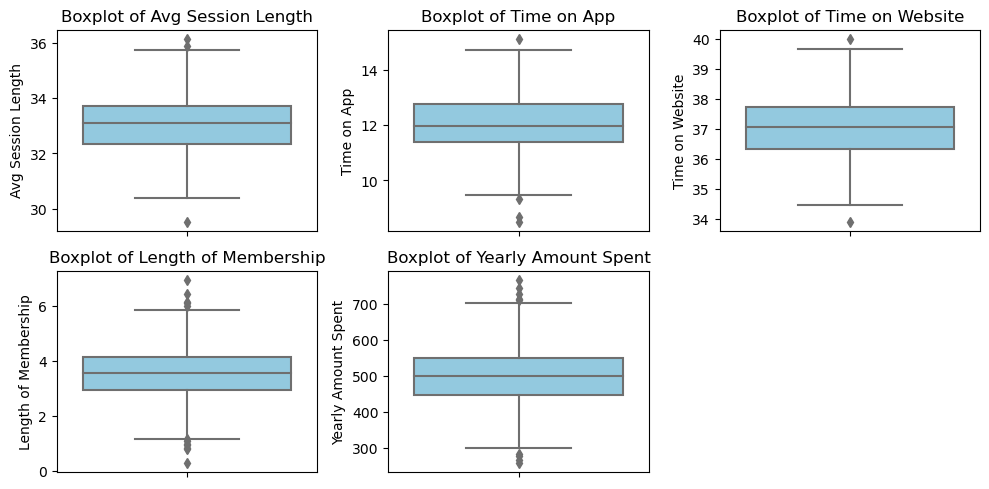

In [11]:
# Boxplots for outlier detection
plt.figure(figsize=(10, 5))
for i, column in enumerate(dataset.select_dtypes(include=['number']).columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=dataset[column], color='skyblue')
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

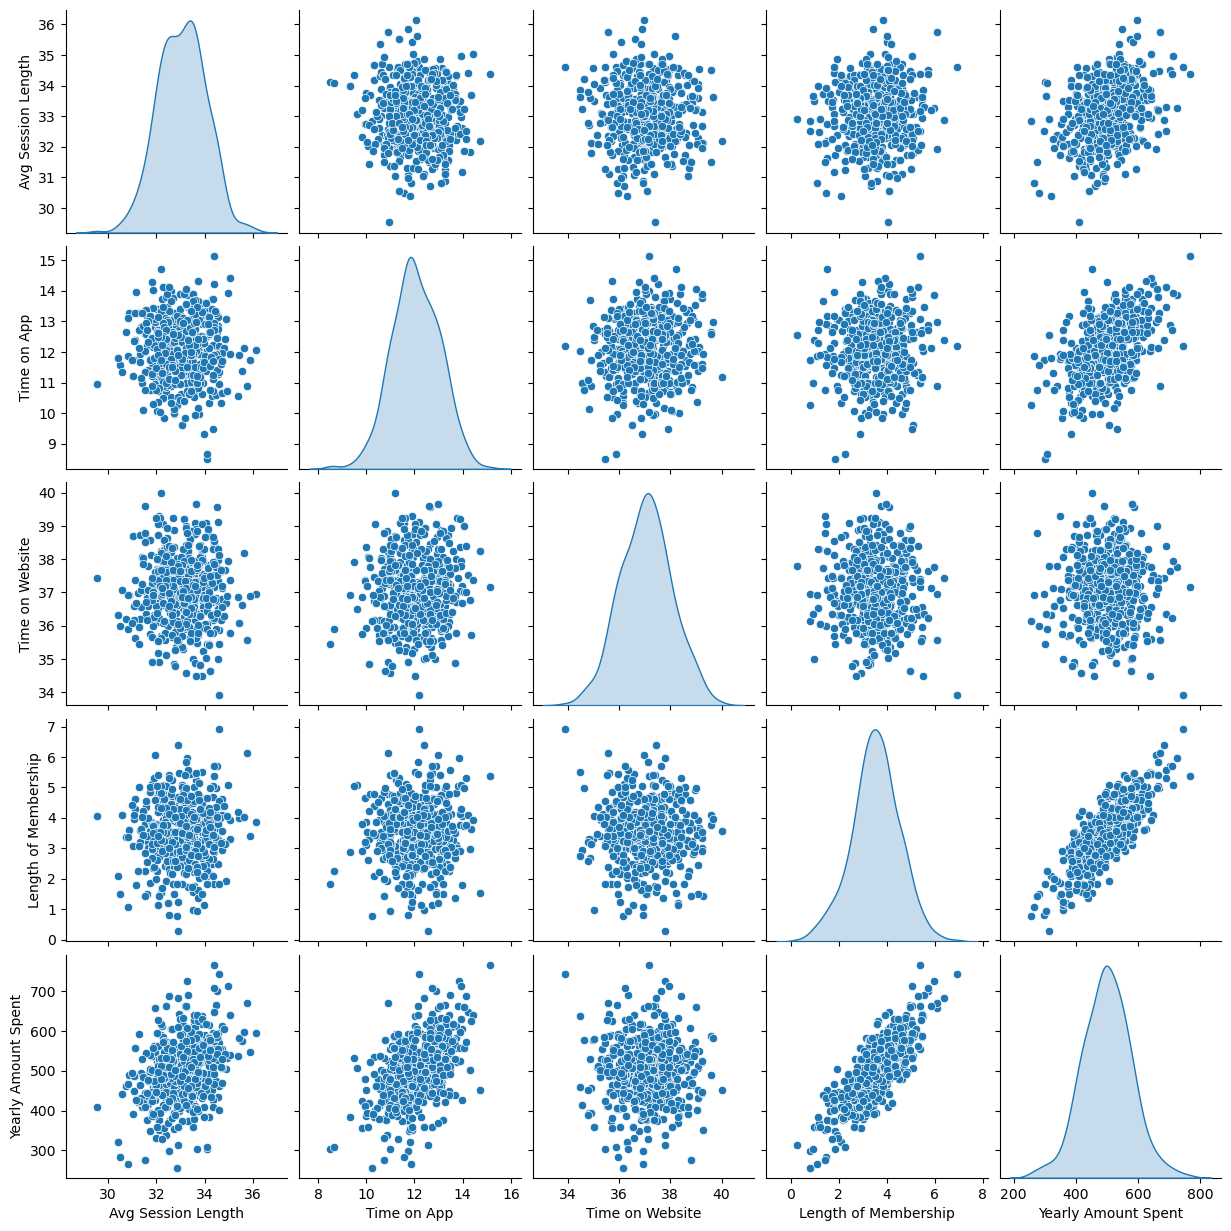

In [12]:
# Pairplot for feature relationships
sns.pairplot(dataset, diag_kind='kde')
plt.show()

In [13]:
# Outlier Detection using Z-score
z_scores = np.abs(stats.zscore(dataset.select_dtypes(include=['number'])))
dataset_outliers = dataset[(z_scores > 3).any(axis=1)]
print("\nOutliers detected:", len(dataset_outliers))


Outliers detected: 8


In [14]:
# Outlier Removal using IQR
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset_no_outliers = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nData size after outlier removal:", dataset_no_outliers.shape)


Data size after outlier removal: (476, 8)


C:\Users\Akky\AppData\Local\Temp\ipykernel_30248\253269349.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset.quantile(0.25)
C:\Users\Akky\AppData\Local\Temp\ipykernel_30248\253269349.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset.quantile(0.75)
C:\Users\Akky\AppData\Local\Temp\ipykernel_30248\253269349.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset_no_outliers = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 

In [15]:
# Variance Inflation Factor (VIF) for multicollinearity check
X = dataset.select_dtypes(include=['number']).dropna()
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif)


Variance Inflation Factor (VIF):
                 Feature          VIF
0    Avg Session Length   912.652625
1           Time on App   487.131785
2       Time on Website  1194.363892
3  Length of Membership   109.208041
4   Yearly Amount Spent   496.684390


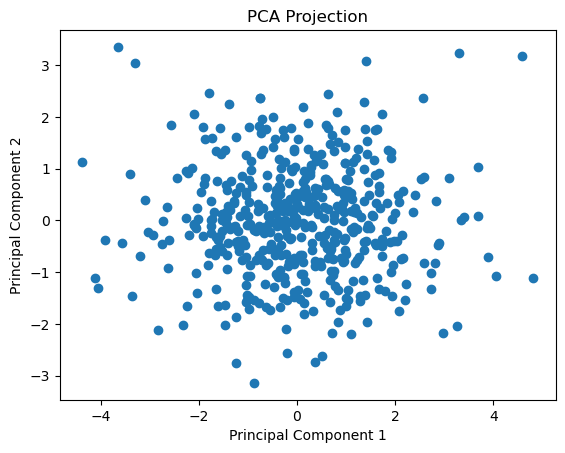

In [16]:
# Principal Component Analysis (PCA)
X_scaled = StandardScaler().fit_transform(dataset.select_dtypes(include=['number']))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [17]:
# Building a predictive model
X = dataset_no_outliers.select_dtypes(include=['number']).drop(columns=['Yearly Amount Spent'])
y = dataset_no_outliers['Yearly Amount Spent']

In [18]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, y_train.shape

((380, 4), (380,))

In [20]:
X_test.shape, y_test.shape

((96, 4), (96,))

In [21]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predictions
y_pred = model.predict(X_test)

In [23]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [24]:
print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Model Performance:
Mean Absolute Error (MAE): 8.06064623629999
Mean Squared Error (MSE): 104.80200100948234
R-squared (R2): 0.9789326764511697


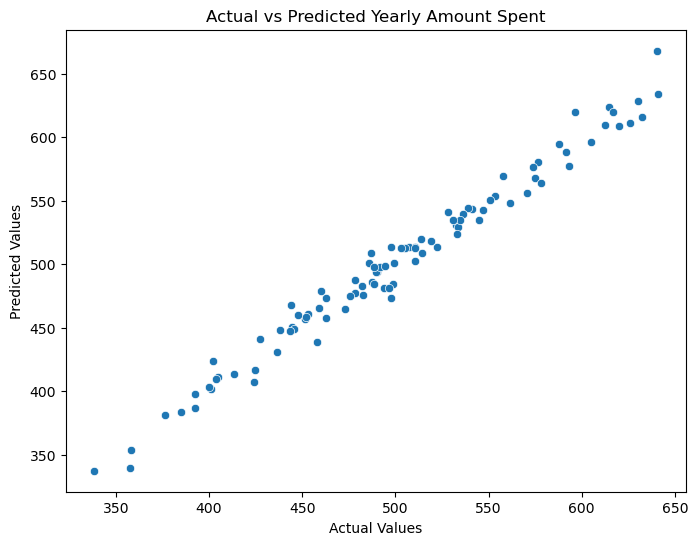

In [25]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Yearly Amount Spent")
plt.show()

In [26]:
# Save the trained model
joblib.dump(model, "ecommercemodel.pkl")

print("Model saved successfully!")

Model saved successfully!
